# Phone Sensors Error Range
-  in this project we are trying to find the error range for the phone sensors
-  insights on how and what effects the sensors 
-  trying to find ways to minimize it
-  Finding out if it is suitable for our application which requires error range less than 7 degrees


In [232]:
import pandas as pd
from matplotlib import pyplot as plt
# from matplotlib.pyplot import figure
import matplotlib_settings
# from datetime import datetime

In [233]:
# date_parser = pd.datetools.to_datetime
dtypes = {'Name': str,'alt':float,'az':float,'phone alt':float,'phone az':float}
date_cols = ['time', 'phone time']
names = ['Name', 'alt', 'az ', 'time', 'phone alt', 'phone az', 'phone time']



df = pd.read_csv("fk.csv",header=0,names = names,parse_dates=date_cols,dtype=dtypes)
df.head()

C:\Users\Mario\AppData\Local\Temp\ipykernel_15728\2257667881.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("fk.csv",header=0,names = names,parse_dates=date_cols,dtype=dtypes)
C:\Users\Mario\AppData\Local\Temp\ipykernel_15728\2257667881.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("fk.csv",header=0,names = names,parse_dates=date_cols,dtype=dtypes)


,Name,alt,az,time,phone alt,phone az,phone time
0,Sirius,-20.78,262.15,20:07.5,-61.567621,147.271043,22:42.2
1,venus,19.60,271.96,23:46.3,16.996129,262.925054,23:58.5
2,venus,19.60,271.96,23:46.3,17.160567,262.265871,24:04.7
3,venus,19.60,271.96,23:46.3,15.616301,261.004778,24:05.9
4,venus,19.28,272.13,25:05.8,15.861417,269.126846,25:11.1


In [234]:
main_readings = ['az','alt','phone alt','phone az']

In [235]:
df.columns 

Index(['Name', 'alt', 'az ', 'time', 'phone alt', 'phone az', 'phone time'], dtype='object')

In [236]:
df.describe()

,alt,az,phone alt,phone az
count,24.000000,24.000000,24.000000,24.000000
mean,20.834167,239.399167,15.764940,233.162142
std,24.752044,80.721282,28.159006,82.865749
min,-20.780000,63.420000,-61.567621,59.884514
25%,4.110000,260.270000,0.721958,253.289324
50%,11.695000,272.130000,7.424362,269.010538
75%,29.112500,280.640000,26.691073,279.530212
max,61.070000,281.010000,57.440485,289.666036


In [237]:
df = df.drop(0,axis=0)
df = df.rename(columns={"az ": "az"})

In [238]:
df['alt error'] = df['alt']- df['phone alt']
df['az error'] = df['az']- df['phone az']
df['index']= range(len(df))

from datetime import datetime

# df['time']= df.time.dtype('dat')
df.head()

,Name,alt,az,time,phone alt,phone az,phone time,alt error,az error,index
1,venus,19.60,271.96,23:46.3,16.996129,262.925054,23:58.5,2.603871,9.034945,0
2,venus,19.60,271.96,23:46.3,17.160567,262.265871,24:04.7,2.439433,9.694129,1
3,venus,19.60,271.96,23:46.3,15.616301,261.004778,24:05.9,3.983699,10.955222,2
4,venus,19.28,272.13,25:05.8,15.861417,269.126846,25:11.1,3.418583,3.003154,3
5,venus,19.28,272.13,25:05.8,13.427673,268.423915,25:11.8,5.852327,3.706085,4


<Axes: xlabel='alt error', ylabel='az error'>

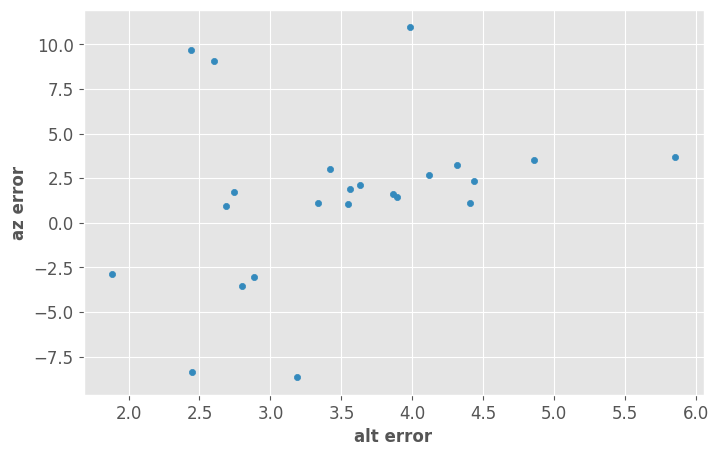

In [239]:
df.plot.scatter(x='alt error', y='az error' )

<Axes: xlabel='index', ylabel='alt error'>

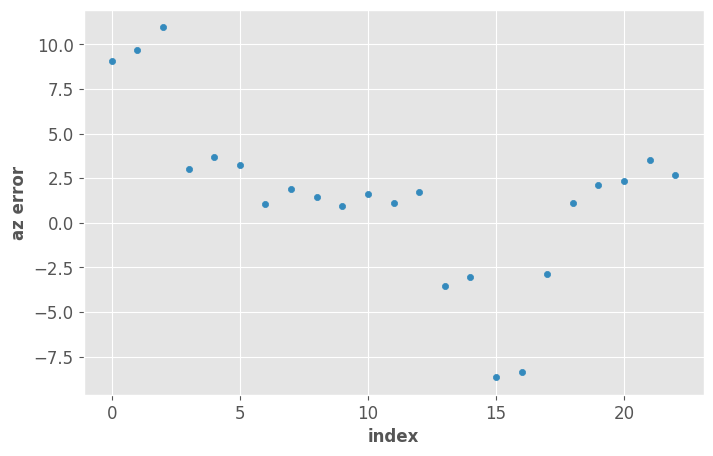

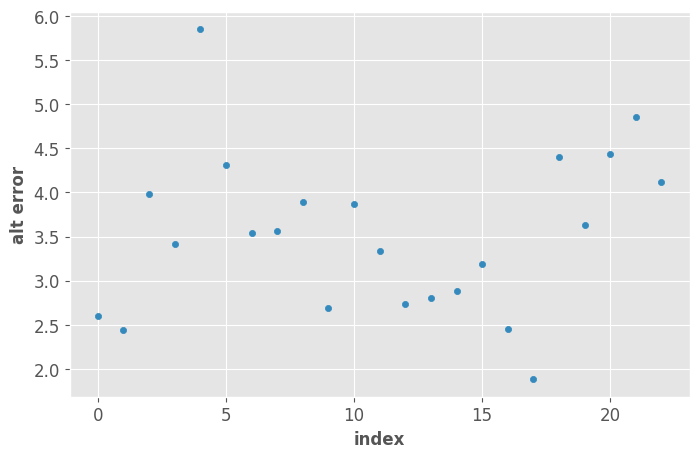

In [240]:
df.plot.scatter(x='index', y='az error' )
df.plot.scatter(x='index', y='alt error' )

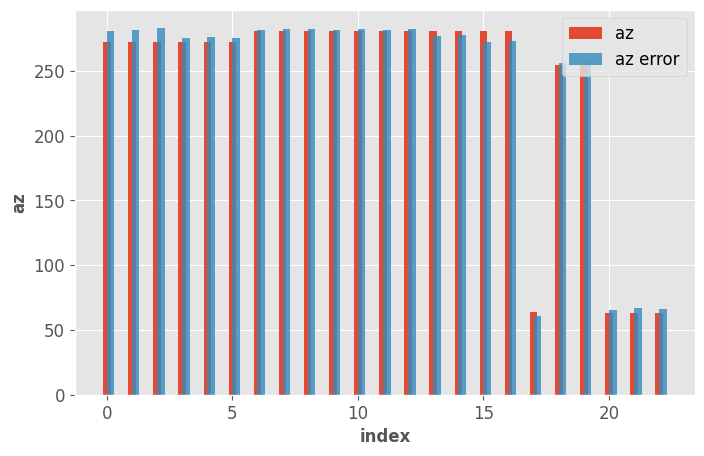

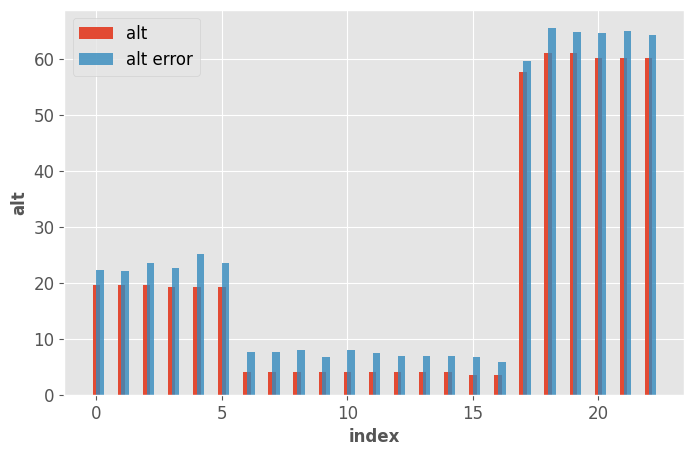

In [241]:
def draw_error(df,name_col):
    plt.bar(df['index'],df[name_col],width=0.3)
    plt.bar(df['index']+0.15,df[name_col]+df[f"{name_col} error"],width=0.3,alpha = 0.8)
    plt.xlabel("index")
    plt.ylabel(name_col)

    plt.legend([name_col,f'{name_col} error'])
    plt.show()

draw_error(df,'az')
draw_error(df,'alt')

__________________________________________________________________________________________________________________________________________________________

### Some insights
- It's suspesous that the most error in the azimuth was at the begining 
    - when we where still tesing the app and not yet sure how it works
    - we were testing it with a planet not a star but we will get to that
    - it was very light poluted place backgroud so I was not able to see the planet clearly
- Altitude is always more than it should be by 2 degrees or more
    - we need to find if there is a relation between the number of degrees of alt and its error
    - we can just minus 2.5 or the mean error from it to get more accurate results
- we need to find if the planet mean error is a lot higher than a star
- The error is a function of differance in time so we need to see it 

__________________________________________________________________________________________________________________________________________________________

In [242]:
df.head()

,Name,alt,az,time,phone alt,phone az,phone time,alt error,az error,index
1,venus,19.60,271.96,23:46.3,16.996129,262.925054,23:58.5,2.603871,9.034945,0
2,venus,19.60,271.96,23:46.3,17.160567,262.265871,24:04.7,2.439433,9.694129,1
3,venus,19.60,271.96,23:46.3,15.616301,261.004778,24:05.9,3.983699,10.955222,2
4,venus,19.28,272.13,25:05.8,15.861417,269.126846,25:11.1,3.418583,3.003154,3
5,venus,19.28,272.13,25:05.8,13.427673,268.423915,25:11.8,5.852327,3.706085,4


### caculating the error in time in seconds

In [243]:
def draw_corr(data,figsize = (12,12)):
    corr =data.corr()
    fig = plt.figure(figsize = figsize)
    # plt.matshow(correlations)
    plt.matshow(corr, cmap= 'RdBu', fignum=fig.number)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.grid(False)
    plt.colorbar()

In [244]:
df['time'].str.split(':').str[1].astype("float")[:5]

1    46.3
2    46.3
3    46.3
4     5.8
5     5.8
Name: time, dtype: float64

In [245]:
convert_seconds = lambda data_frame,x: data_frame[x].str.split(':').str[1].astype("float")+data_frame[x].str.split(':').str[0].astype("int")*60

In [246]:
convert_seconds(df,'time')[:5]

1    1426.3
2    1426.3
3    1426.3
4    1505.8
5    1505.8
Name: time, dtype: float64

In [247]:
df['lag_time'] =convert_seconds(df,'phone time') -  convert_seconds(df,'time')
df.head()

,Name,alt,az,time,phone alt,phone az,phone time,alt error,az error,index,lag_time
1,venus,19.60,271.96,23:46.3,16.996129,262.925054,23:58.5,2.603871,9.034945,0,12.2
2,venus,19.60,271.96,23:46.3,17.160567,262.265871,24:04.7,2.439433,9.694129,1,18.4
3,venus,19.60,271.96,23:46.3,15.616301,261.004778,24:05.9,3.983699,10.955222,2,19.6
4,venus,19.28,272.13,25:05.8,15.861417,269.126846,25:11.1,3.418583,3.003154,3,5.3
5,venus,19.28,272.13,25:05.8,13.427673,268.423915,25:11.8,5.852327,3.706085,4,6.0


In [248]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numerical = df.select_dtypes(include=numerics).drop('index',axis=1)
df_numerical.head()


,alt,az,phone alt,phone az,alt error,az error,lag_time
1,19.60,271.96,16.996129,262.925054,2.603871,9.034945,12.2
2,19.60,271.96,17.160567,262.265871,2.439433,9.694129,18.4
3,19.60,271.96,15.616301,261.004778,3.983699,10.955222,19.6
4,19.28,272.13,15.861417,269.126846,3.418583,3.003154,5.3
5,19.28,272.13,13.427673,268.423915,5.852327,3.706085,6.0


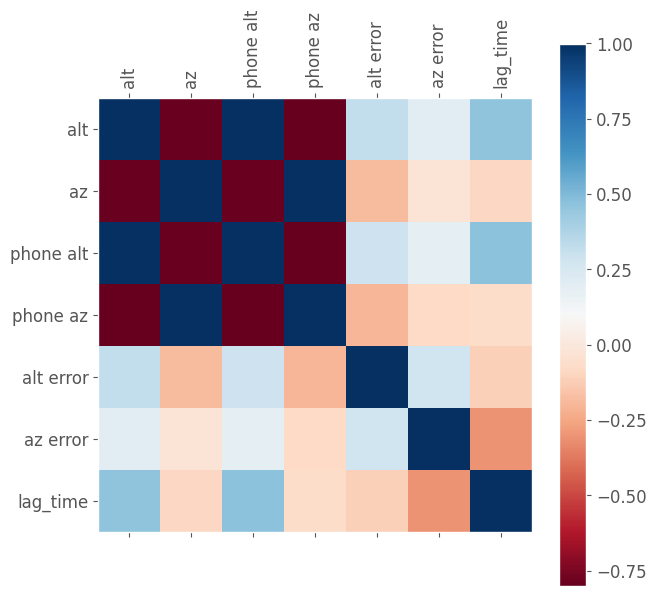

In [249]:
draw_corr(df_numerical,(7,7))

- this is odd because the lage_time should an effect + on both errors 
- lets take the abs of the errors
- devide the lag by the errors

In [250]:
df['alt er abs'] = df['alt error'].abs()
df['az er abs'] = df['az error'].abs()
df['error by lag alt'] = df['alt error']/df['lag_time']
df['error by lag az'] =df['az error']/df['lag_time']
df.head()

,Name,alt,az,time,phone alt,phone az,phone time,alt error,az error,index,lag_time,alt er abs,az er abs,error by lag alt,error by lag az
1,venus,19.60,271.96,23:46.3,16.996129,262.925054,23:58.5,2.603871,9.034945,0,12.2,2.603871,9.034945,0.213432,0.740569
2,venus,19.60,271.96,23:46.3,17.160567,262.265871,24:04.7,2.439433,9.694129,1,18.4,2.439433,9.694129,0.132578,0.526855
3,venus,19.60,271.96,23:46.3,15.616301,261.004778,24:05.9,3.983699,10.955222,2,19.6,3.983699,10.955222,0.203250,0.558940
4,venus,19.28,272.13,25:05.8,15.861417,269.126846,25:11.1,3.418583,3.003154,3,5.3,3.418583,3.003154,0.645016,0.566633
5,venus,19.28,272.13,25:05.8,13.427673,268.423915,25:11.8,5.852327,3.706085,4,6.0,5.852327,3.706085,0.975388,0.617681


In [251]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numerical = df.select_dtypes(include=numerics).drop('index',axis=1)
df_numerical.head()


,alt,az,phone alt,phone az,alt error,az error,lag_time,alt er abs,az er abs,error by lag alt,error by lag az
1,19.60,271.96,16.996129,262.925054,2.603871,9.034945,12.2,2.603871,9.034945,0.213432,0.740569
2,19.60,271.96,17.160567,262.265871,2.439433,9.694129,18.4,2.439433,9.694129,0.132578,0.526855
3,19.60,271.96,15.616301,261.004778,3.983699,10.955222,19.6,3.983699,10.955222,0.203250,0.558940
4,19.28,272.13,15.861417,269.126846,3.418583,3.003154,5.3,3.418583,3.003154,0.645016,0.566633
5,19.28,272.13,13.427673,268.423915,5.852327,3.706085,6.0,5.852327,3.706085,0.975388,0.617681


In [252]:
df_numerical.describe()

,alt,az,phone alt,phone az,alt error,az error,lag_time,alt er abs,az er abs,error by lag alt,error by lag az
count,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,22.643478,238.41000,19.127226,236.896538,3.516253,1.513462,23.747826,3.516253,3.810447,0.247251,0.163856
std,23.629943,82.38661,23.352089,82.637437,0.917629,4.748137,17.614066,0.917629,3.124101,0.224087,0.285155
min,3.480000,63.42000,0.217541,59.884514,1.881548,-8.656036,5.300000,1.881548,0.943029,0.050550,-0.360668
25%,4.110000,263.29500,0.902653,257.276609,2.768987,1.000294,12.700000,2.768987,1.664001,0.104083,0.023069
50%,19.280000,272.13000,13.427673,269.126846,3.545316,1.701283,18.400000,3.545316,2.845186,0.203250,0.108537
75%,38.625000,280.64000,36.221578,279.547622,4.049885,3.119462,28.150000,4.049885,3.620786,0.273896,0.312550
max,61.070000,281.01000,57.440485,289.666036,5.852327,10.955222,71.800000,5.852327,10.955222,0.975388,0.740569


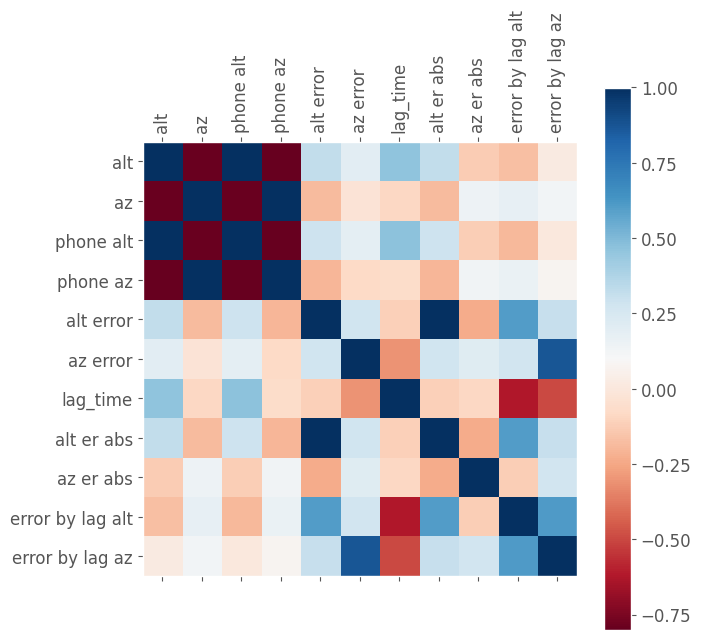

In [253]:
draw_corr(df_numerical,(7,7))

In [254]:
df.head()

,Name,alt,az,time,phone alt,phone az,phone time,alt error,az error,index,lag_time,alt er abs,az er abs,error by lag alt,error by lag az
1,venus,19.60,271.96,23:46.3,16.996129,262.925054,23:58.5,2.603871,9.034945,0,12.2,2.603871,9.034945,0.213432,0.740569
2,venus,19.60,271.96,23:46.3,17.160567,262.265871,24:04.7,2.439433,9.694129,1,18.4,2.439433,9.694129,0.132578,0.526855
3,venus,19.60,271.96,23:46.3,15.616301,261.004778,24:05.9,3.983699,10.955222,2,19.6,3.983699,10.955222,0.203250,0.558940
4,venus,19.28,272.13,25:05.8,15.861417,269.126846,25:11.1,3.418583,3.003154,3,5.3,3.418583,3.003154,0.645016,0.566633
5,venus,19.28,272.13,25:05.8,13.427673,268.423915,25:11.8,5.852327,3.706085,4,6.0,5.852327,3.706085,0.975388,0.617681


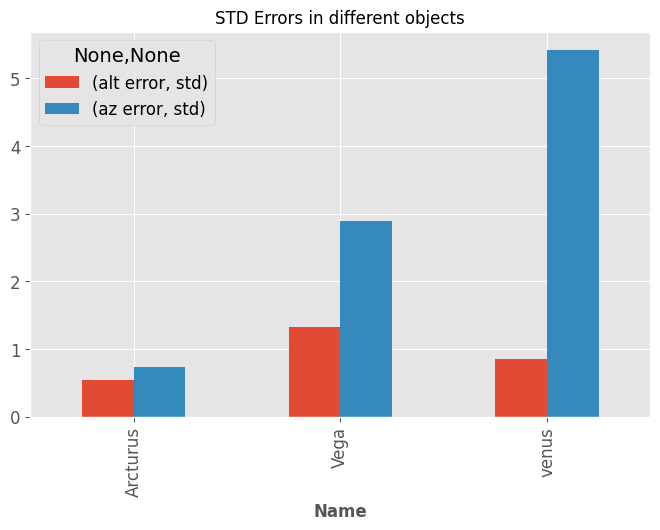

<Axes: title={'center': 'Mean Errors in different objects'}, xlabel='Name'>

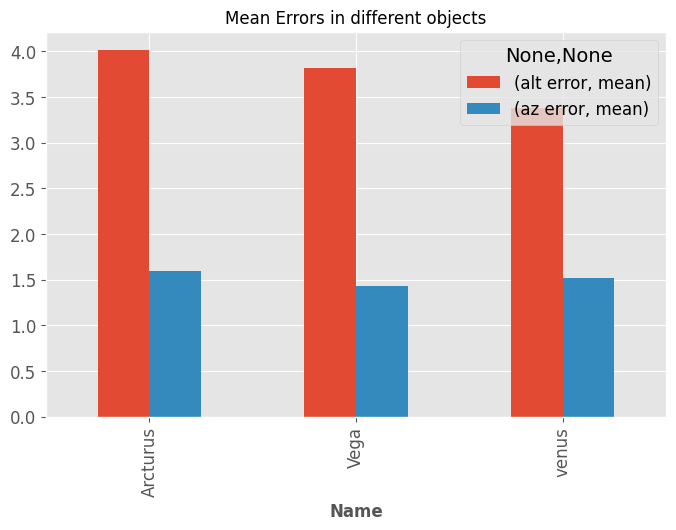

In [255]:
df_grouped1 = df.groupby(['Name'])[['alt error'	,'az error']]
df_grouped1.agg(["std"]).plot.bar(title = 'STD Errors in different objects')
plt.show()
df_grouped1 = df.groupby(['Name'])[['alt error'	,'az error']]
df_grouped1.agg(["mean"]).plot.bar(title = 'Mean Errors in different objects')

<Axes: title={'center': 'STD Errors in different objects and the lag time relation'}, xlabel='Name'>

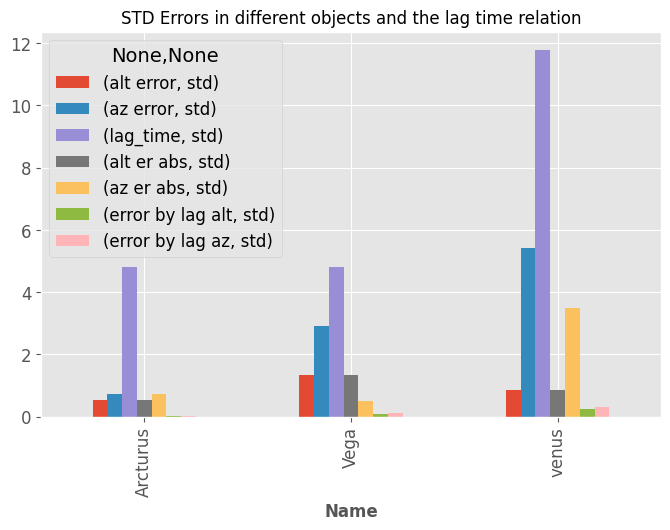

In [256]:
df_grouped1 = df.groupby(['Name'])[df_numerical.drop(main_readings,axis =1).columns]
df_grouped1.agg(["std"]).plot.bar(title = 'STD Errors in different objects and the lag time relation')

<Axes: title={'center': 'Mean Errors in different objects and the lag time relation'}, xlabel='Name'>

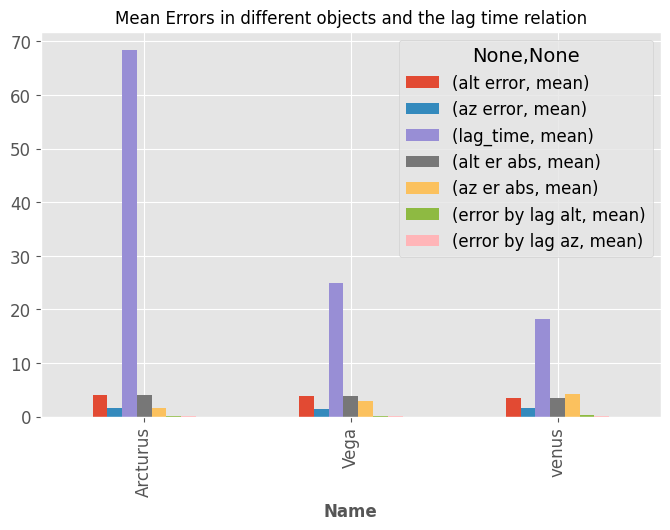

In [257]:
df_grouped1 = df.groupby(['Name'])[df_numerical.drop(main_readings,axis =1).columns]
df_grouped1.agg(["mean"]).plot.bar(title = 'Mean Errors in different objects and the lag time relation')

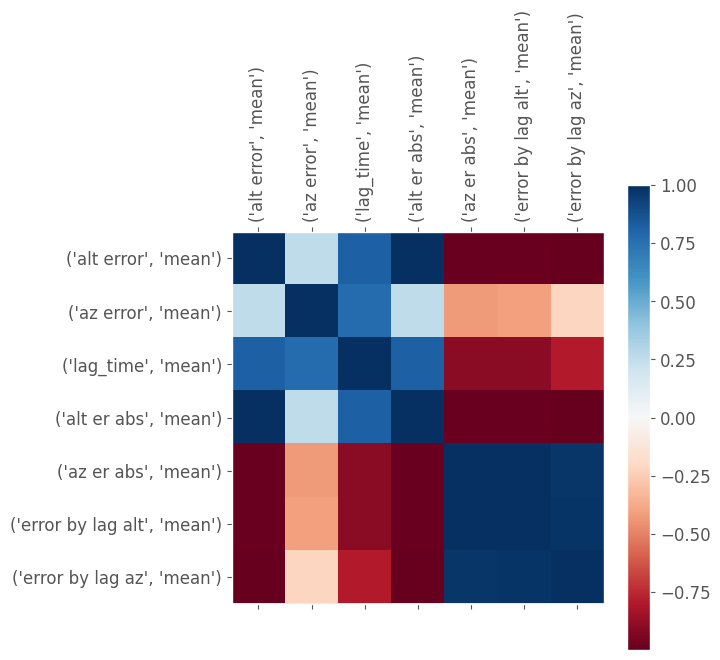

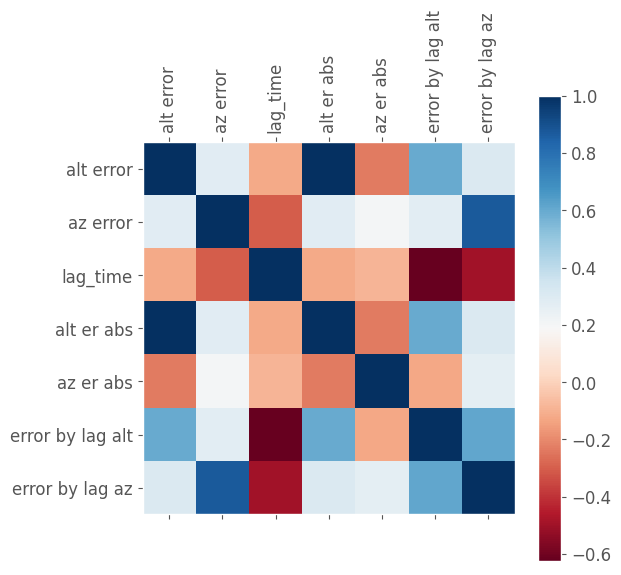

In [258]:
draw_corr(df_grouped1.agg(["mean"]),(6,6))
draw_corr(df_numerical.drop(main_readings,axis =1),(6,6))

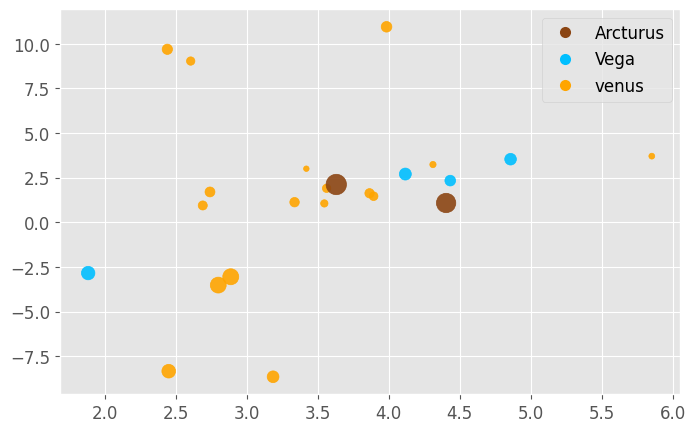

In [259]:
import numpy as np

cmap = {'venus':'orange','Arcturus':'saddlebrown','Vega':'deepskyblue'}

colors =[cmap[df.iloc[i,0]] for i in range(len(df))]
df['color'] = colors

sc =plt.scatter(x = df_numerical['alt error'],y = df_numerical['az error'],s = df_numerical['lag_time']*3,c=colors,alpha = 0.9)




lp = lambda i,camp: plt.plot([],color=camp, mec="none",
                        label=f"{i}", ls="", marker="o")[0]
handles = [lp(name,cmap[name]) for name in np.unique(df['Name'])]
plt.legend(handles=handles)
plt.show()

______________________________
## I found very little relation between the delay or lag of time and the sensors error 

While this may need more observations to say for sure but for now I found little relation because the change of the star and planet with time "seconds" is very little compared to not really being able to find the star in the sky, but still one of the reasons 

In [260]:
df = df.drop(['error by lag alt',	'error by lag az'],axis =1)
df.head()

,Name,alt,az,time,phone alt,phone az,phone time,alt error,az error,index,lag_time,alt er abs,az er abs,color
1,venus,19.60,271.96,23:46.3,16.996129,262.925054,23:58.5,2.603871,9.034945,0,12.2,2.603871,9.034945,orange
2,venus,19.60,271.96,23:46.3,17.160567,262.265871,24:04.7,2.439433,9.694129,1,18.4,2.439433,9.694129,orange
3,venus,19.60,271.96,23:46.3,15.616301,261.004778,24:05.9,3.983699,10.955222,2,19.6,3.983699,10.955222,orange
4,venus,19.28,272.13,25:05.8,15.861417,269.126846,25:11.1,3.418583,3.003154,3,5.3,3.418583,3.003154,orange
5,venus,19.28,272.13,25:05.8,13.427673,268.423915,25:11.8,5.852327,3.706085,4,6.0,5.852327,3.706085,orange
